In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import repos_tools
import os.path
import re
import dream
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!


Here I analyze in the context of Alzheimer's the consenus network modules identified in the [DREAM network module challenge](https://www.nature.com/articles/s41592-019-0509-5):

1. I first calculate p-values for each module being associated to AD using Pascal
2. I then look at AD genes in each module using our AD gene sets (knowledge, TWAS,...)

Convert gene symbols to Entrez IDs in a GMT gene set file.

In [2]:
hgn_fpath = '/Users/jonesa7/CTNS/resources/hgnc/hgnc_complete_set.txt'
ingmt_fpath = '../../results/2022-08-22-dream-modules/dream_consensus_modules-PPI-STRING_Consensus.gmt'
outgmt_fpath = '../../results/2022-08-22-dream-modules/dream_consensus_modules-PPI-STRING_Consensus-entrez_id.gmt'
if not os.path.exists(outgmt_fpath):
    repos_tools.symbol2entrez_gmt(ingmt_fpath, outgmt_fpath, hgn_fpath)

How Pascal was run:

In [3]:
enrichment_fpath = '../../results/2022-08-22-dream-modules/output/35379992-GCST90027158-MONDO_0004975-Build38-corrected.f.tsv.PathwaySet--dream_consensus_modules-PPI-STRING_Consensus-entrez_id--sum.txt'
enrichment = pd.read_csv(enrichment_fpath, sep='\t', index_col='Name')

# read gene sets
with open(ingmt_fpath) as f:
    D = dict()
    for line in f:
        lin = line.rstrip().split('\t')
        d = {lin[0]: lin[2:]}
        D.update(d)
gsets = pd.DataFrame(pd.Series(D), columns=['Genes'])

# join enrichment and gene sets
enrichment = pd.concat([enrichment, gsets], axis=1)
enrichment['numGenes'] = enrichment.Genes.apply(lambda l: len(l))
enrichment

,chi2Pvalue,empPvalue,Genes,numGenes
PPI-STRING_Consensus_mod272,0.000020,0.00074,"[LAIR1, SLA, FCAR, FCGR3A, ITK, CD58, C7orf43,...",67
PPI-STRING_Consensus_mod248,0.000110,0.00094,"[PIK3R1, SKAP2, SH3BP5, SHC4, PDGFB, DOK3, HCL...",74
PPI-STRING_Consensus_mod191,0.000894,0.00115,"[AVPR1B, GNG2, GNAQ, APP, SPIN3, CPE, PLCB3, P...",31
PPI-STRING_Consensus_mod142,0.000907,0.00248,"[HS3ST1, SDC1, B3GALT6, SDC3, SDC2, SLC35D2, H...",32
PPI-STRING_Consensus_mod328,0.001421,0.00302,"[MCOLN2, TMPRSS9, KATNAL2, ABI3, NKIRAS2, GPR1...",55
...,...,...,...,...
PPI-STRING_Consensus_mod358,0.989155,0.98939,"[CTIF, C1orf212, TSPAN31, SLC41A1, C8orf4, GPB...",45
PPI-STRING_Consensus_mod47,0.992947,0.99270,"[SPHK1, SPHK2, CERS3, CERK, SGPP2, CERS4, SGMS...",28
PPI-STRING_Consensus_mod66,0.998098,0.99812,"[ACACA, ACACB, SCP2D1, CPT1C, MS4A8B, HMGCL, A...",94
PPI-STRING_Consensus_mod9,0.998261,0.99844,"[OR1D2, OR5A1, OR4K15, OR51Q1, OR5AK2, OR5H15,...",66


In [4]:
enrichment_pretty = enrichment.copy()
enrichment_pretty['Genes'] = enrichment_pretty.Genes.apply(lambda l: ' '.join(l))
enrichment_pretty.to_csv('../../results/2022-08-22-dream-modules/dream-modules-AD-GWAS.csv')

In [5]:
genes = pd.read_csv('../../results/2022-08-11-pascal/results.csv', index_col=0).fillna(0)
genes.head()

,chromosome,start,end,strand,gene_id,numSnps,pvalue,Status,knowledge,TWAS,TWAS2+,agora,agora2+,DESudhir,AD DE APOE3-APOE3,AD DE APOE4-APOE4,APOE3-4 DE neuron,APOE3-4 DE astrocyte,APOE3-4 DE microglia,rMTA-APOE3-4
CYB561,chr17,61509664,61523722,-,1534,97,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGSF23,chr19,45116939,45140081,+,147710,204,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PVR,chr19,45147097,45169428,+,5817,239,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CLASRP,chr19,45542297,45574214,+,11129,247,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RELB,chr19,45504706,45541456,+,5971,212,1.000000e-12,DAVIES_LOWPRECISION_FAREBROTHER_FAIL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
gsets = genes.columns[genes.columns.to_list().index('knowledge'):].to_list()
gsets

['knowledge',
 'TWAS',
 'TWAS2+',
 'agora',
 'agora2+',
 'DESudhir',
 'AD DE APOE3-APOE3',
 'AD DE APOE4-APOE4',
 'APOE3-4 DE neuron',
 'APOE3-4 DE astrocyte',
 'APOE3-4 DE microglia',
 'rMTA-APOE3-4']

In [7]:
enrichment_memberships = dream.all_module_memberships(enrichment, genes)
enrichment_memberships.to_csv('../../results/2022-08-22-dream-modules/dream-modules-AD-GWAS-AD-genesets.csv')
enrichment_memberships.head()

,chi2Pvalue,empPvalue,Genes,numGenes,knowledge_genes,knowledge_genes_num,knowledge_genes_frac,knowledge_FisherE_p,knowledge_FisherE_log_p,TWAS_genes,...,APOE3-4 DE microglia_genes,APOE3-4 DE microglia_genes_num,APOE3-4 DE microglia_genes_frac,APOE3-4 DE microglia_FisherE_p,APOE3-4 DE microglia_FisherE_log_p,rMTA-APOE3-4_genes,rMTA-APOE3-4_genes_num,rMTA-APOE3-4_genes_frac,rMTA-APOE3-4_FisherE_p,rMTA-APOE3-4_FisherE_log_p
PPI-STRING_Consensus_mod272,0.000020,0.00074,C6orf25 C7orf43 CD2 CD244 CD300LF CD33 CD37 CD...,67,TREM2,1,0.014925,0.000092,-4.034388,CD33 FCER1G MS4A2 PILRA PILRB TREM2,...,TREM2,1,0.014925,0.000092,-4.034388,,0,0.000000,1.000000,0.000000
PPI-STRING_Consensus_mod248,0.000110,0.00094,ALK ANGPT1 APOL5 BDNF BLNK CBL CD19 CD22 CD2AP...,74,,0,0.000000,1.000000,0.000000,CD2AP INPP5D NCK2 PLCG2,...,,0,0.000000,1.000000,0.000000,,0,0.000000,1.000000,0.000000
PPI-STRING_Consensus_mod191,0.000894,0.00115,AGT AMELX AMELY APP AVPR1B CD200 CD200R1 CD200...,31,APP,1,0.032258,0.000092,-4.035109,APP MS4A6A,...,,0,0.000000,1.000000,0.000000,PLCB1,1,0.032258,0.000092,-4.035109
PPI-STRING_Consensus_mod142,0.000907,0.00248,AGRN B3GALT6 B4GALT7 EXT1 EXT2 GLCE GPC2 GPC3 ...,32,HSPG2,1,0.031250,0.000092,-4.035089,GPC2,...,HPSE2,1,0.031250,0.000092,-4.035089,,0,0.000000,1.000000,0.000000
PPI-STRING_Consensus_mod328,0.001421,0.00302,ABI3 AFF2 AFF3 ANKRD13B ANKRD13D C16orf62 C17o...,55,,0,0.000000,1.000000,0.000000,LACTB PRSS36 SPPL2A,...,,0,0.000000,1.000000,0.000000,,0,0.000000,1.000000,0.000000


['named-figure/empPvalue-vs-chi2Pvalue.png',
 'named-figure/empPvalue-vs-chi2Pvalue.pdf']

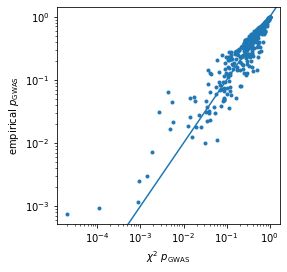

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x='chi2Pvalue', y='empPvalue', marker='.', data=enrichment_memberships)
ax.set_xlabel(r'$\chi^2$ $p_\mathrm{GWAS}$')
ax.set_ylabel(r'empirical $p_\mathrm{GWAS}$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axline((0,0), (1,1))
attila_utils.savefig(fig, 'empPvalue-vs-chi2Pvalue')

['named-figure/frac-AD-genes-in-dream-modules-vs-AD-GWAS-pval.png',
 'named-figure/frac-AD-genes-in-dream-modules-vs-AD-GWAS-pval.pdf']

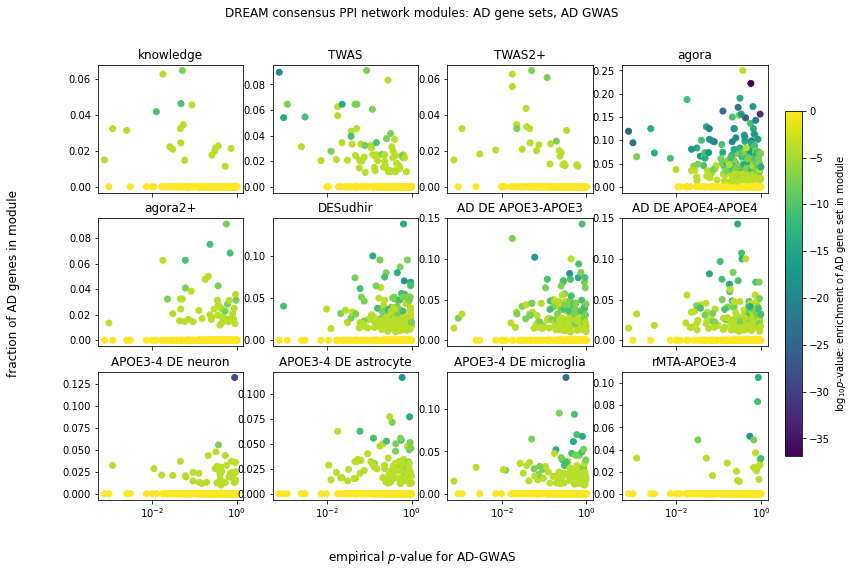

In [9]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=False, figsize=(12, 8))
vmin = enrichment_memberships[[col for col in enrichment_memberships.columns if re.match('.*_FisherE_log_p', col)]].min().min()
vmax = 0
for ix, gset in zip(zip(*np.unravel_index(range(len(gsets)), (3, 4))), gsets):
    ax[ix].scatter(x='empPvalue', y=gset + '_genes_frac', c=gset + '_FisherE_log_p', cmap='viridis', vmin=vmin, vmax=vmax, marker='o', data=enrichment_memberships)
    #ax[ix].scatter(x='chi2Pvalue', y=gset + '_genes_frac', marker='.', data=enrichment_memberships)
    ax[ix].set_xscale('log')
    ax[ix].set_title(gset)
fig.suptitle('DREAM consensus PPI network modules: AD gene sets, AD GWAS')
fig.supxlabel(r'empirical $p$-value for AD-GWAS')
fig.supylabel(r'fraction of AD genes in module')
cb_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cm = plt.cm.ScalarMappable(cmap='viridis')
cm.set_clim(vmin=vmin, vmax=vmax)
fig.colorbar(cm, cax=cb_ax, label=r'$\log_{10} p$-value: enrichment of AD gene set in module')
attila_utils.savefig(fig, 'frac-AD-genes-in-dream-modules-vs-AD-GWAS-pval')

['named-figure/frac-AD-genes-in-dream-modules-low-vs-high-AD-GWAS-pval.png',
 'named-figure/frac-AD-genes-in-dream-modules-low-vs-high-AD-GWAS-pval.pdf']

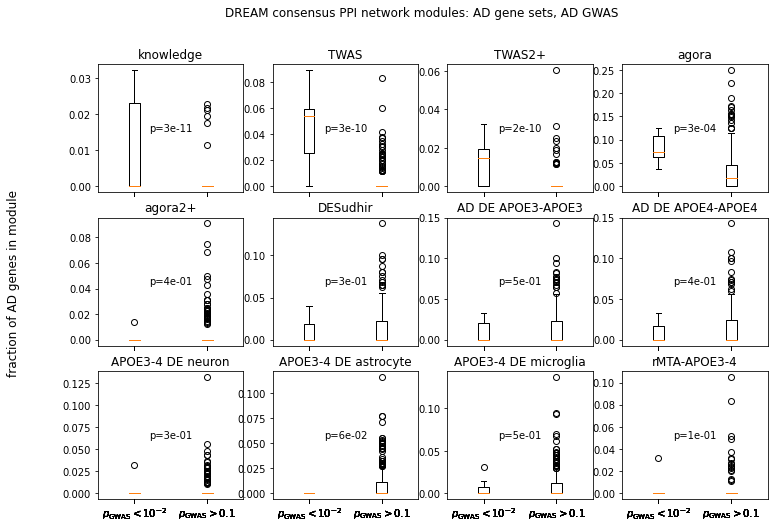

In [10]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=False, figsize=(12, 8))
for ix, gset in zip(zip(*np.unravel_index(range(len(gsets)), (3, 4))), gsets):
    sigmod = enrichment_memberships.loc[enrichment_memberships.empPvalue < 1e-2, gset + '_genes_frac']
    notsigmod = enrichment_memberships.loc[enrichment_memberships.empPvalue >= 1e-1, gset + '_genes_frac']
    pval = scipy.stats.mannwhitneyu(sigmod, notsigmod).pvalue
    ax[ix].text(0.5, 0.5, f'p={pval:1.0e}', transform=ax[ix].transAxes, verticalalignment='center', horizontalalignment='center')
    ax[ix].boxplot(x=list((sigmod, notsigmod)), labels=[r'$p_\mathrm{GWAS} < 10^{-2}$', r'$p_\mathrm{GWAS} > 0.1$'])
    ax[ix].set_title(gset)
fig.suptitle('DREAM consensus PPI network modules: AD gene sets, AD GWAS')
fig.supylabel(r'fraction of AD genes in module')
attila_utils.savefig(fig, 'frac-AD-genes-in-dream-modules-low-vs-high-AD-GWAS-pval')

In [11]:
%connect_info

{
  "shell_port": 55470,
  "iopub_port": 55471,
  "stdin_port": 55472,
  "control_port": 55474,
  "hb_port": 55473,
  "ip": "127.0.0.1",
  "key": "05b6624d-d4183dc29562f5e6cfd99bdc",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-fd2e0374-f675-4eda-b299-91c4bf0a7c8c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
